In [7]:
'''
importing needed libraries
'''
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

'''
reading dataframe using pandas
'''
#making pandas shows max columns to keep track on all of the features
pd.set_option("display.max_columns", None)

listings = pd.read_csv("BonstonDataset/listings.csv")

listings['city_cleansed']=listings['city'].copy()

In [8]:
'''
removing reduandant city data also making this feature as a unique one by filtering the city names
'''

'\nremoving reduandant city data also making this feature as a unique one by filtering the city names\n'

In [9]:
'''
removing redundant data from city values also to clean data
'''
listings['city_cleansed']=listings['city'].copy()
def replace_name(df,old_str,new_str):
    df['city_cleansed']=df['city_cleansed'].replace(old_str,new_str)
    return df['city_cleansed']

listings['city_cleansed']=replace_name(listings,'ALLSTON','Allston')
listings['city_cleansed']=replace_name(listings,'Roslindale, Boston','Roslindale')
listings['city_cleansed']=replace_name(listings,'dorchester, boston ','Dorchester')
listings['city_cleansed']=replace_name(listings,['Boston ', 'boston'],'Boston')
listings['city_cleansed']=replace_name(listings,'east Boston','East Boston')
listings['city_cleansed']=replace_name(listings,'Boston (Charlestown)','Charlestown')
listings['city_cleansed']=replace_name(listings,'ROXBURY CROSSING','Roxbury Crossing')
listings['city_cleansed']=replace_name(listings,'Brighton ','Brighton')
listings['city_cleansed']=replace_name(listings, ['Jamaica Plain, Boston', 'Jamaica Plain (Boston)',
     'Jamaica Plain ', 'Jamaica plain ', 'Boston (Jamaica Plain)',], 'Jamaica Plain')

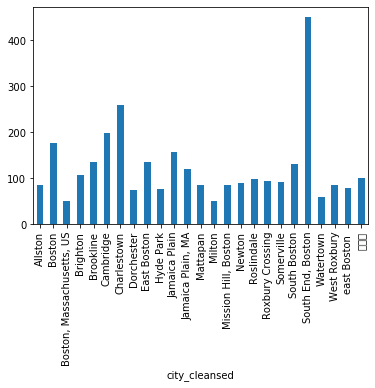

In [10]:
'''
removing , from price column to parse column to float
ploting cleansed cities according to prices
'''

listings['price']=listings['price'].map(lambda x:int(x[1:-3].replace(',','')))

listings.groupby('city_cleansed')['price'].mean().plot(x='city_cleansed',y='price',kind='bar')


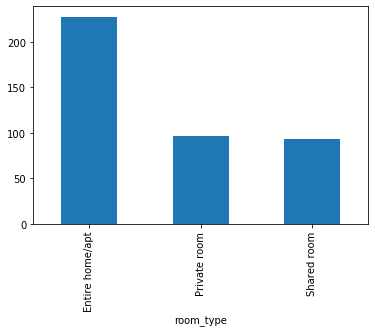

In [11]:
#ploting data grouping with room type and price
listings.groupby('room_type')['price'].mean().plot(x='room_type',y='price',kind='bar')

1.0


bathrooms
0.0    AxesSubplot(0.125,0.125;0.775x0.755)
0.5    AxesSubplot(0.125,0.125;0.775x0.755)
1.0    AxesSubplot(0.125,0.125;0.775x0.755)
1.5    AxesSubplot(0.125,0.125;0.775x0.755)
2.0    AxesSubplot(0.125,0.125;0.775x0.755)
2.5    AxesSubplot(0.125,0.125;0.775x0.755)
3.0    AxesSubplot(0.125,0.125;0.775x0.755)
3.5    AxesSubplot(0.125,0.125;0.775x0.755)
4.0    AxesSubplot(0.125,0.125;0.775x0.755)
4.5    AxesSubplot(0.125,0.125;0.775x0.755)
5.0    AxesSubplot(0.125,0.125;0.775x0.755)
6.0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: price, dtype: object

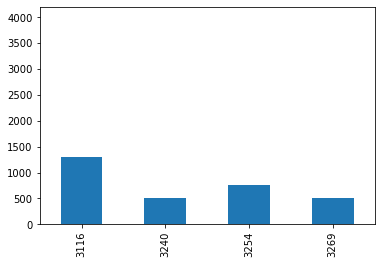

In [12]:
listings['bathrooms']=listings['bathrooms'].fillna(listings['bathrooms'].median())

print(listings['bathrooms'].median())
listings.groupby('bathrooms')['price'].plot(x='bathrooms',y='price',kind='bar')

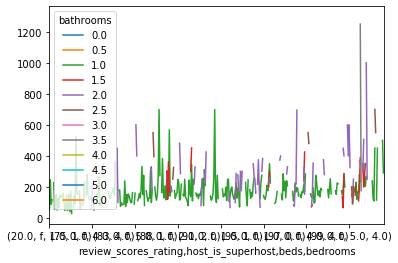

In [26]:
listings.groupby(['review_scores_rating','host_is_superhost','beds','bedrooms','bathrooms'])['price'].mean().unstack().plot()

In [14]:
listings['bathrooms']=listings['bathrooms'].fillna(listings['bathrooms'].median())

np.sum(listings['bathrooms'].isna().any())

0

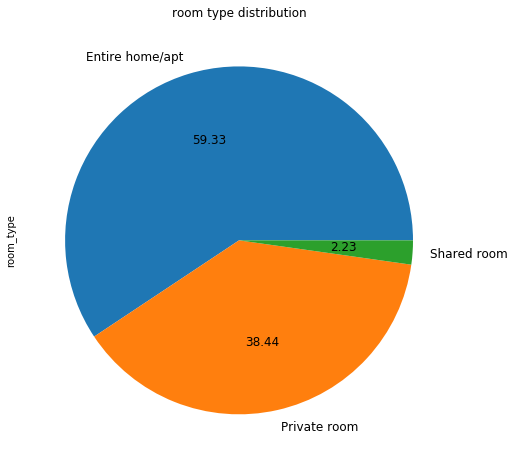

In [15]:
'''
calculating distribuation of room types using pie plot
'''

room_type_count=listings['room_type'].value_counts()

room_type_count.plot.pie(figsize=(8,8),fontsize=12,autopct='%.2f',title='room type distribution')

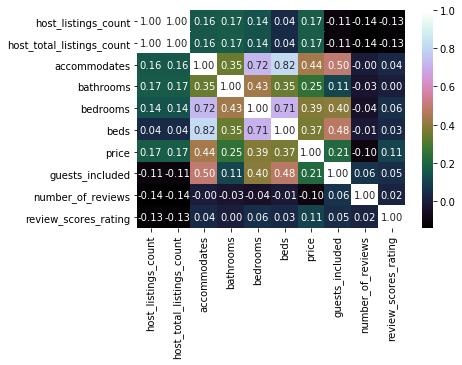

In [16]:
'''
calculating correlation matrix using host list count, accommodate, host total listings count,no. bathrooms,no. bedrooms, no. beds,
no. of gusts included, no of reviews
'''
corr=listings[['host_listings_count', 'host_total_listings_count', 'accommodates',
                     'bathrooms', 'bedrooms', 'beds', 'price', 'guests_included', 'number_of_reviews',
                     'review_scores_rating']].corr()

sns.heatmap(corr,annot=True,cmap='cubehelix',vmax=1,fmt='.2f')

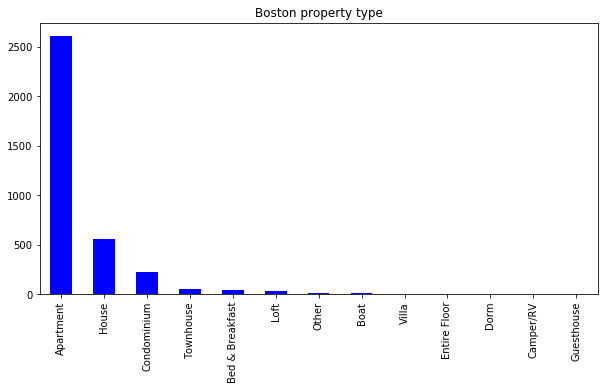

In [17]:
'''ploting to view distribution of property type inside dataset'''
property_type=listings['property_type'].value_counts()
property_type.plot.bar(color='blue',figsize=(10,5),title='Boston property type')


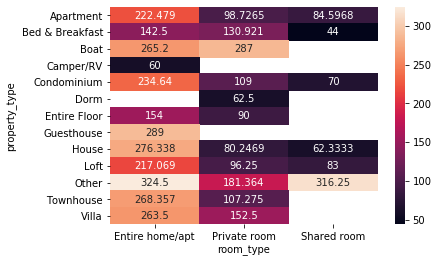

In [18]:
sns.heatmap(listings.groupby(['property_type','room_type']).price.mean().unstack(),annot=True,fmt='g')

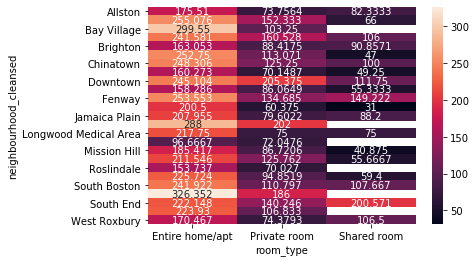

In [19]:
sns.heatmap(listings.groupby(['neighbourhood_cleansed','room_type']).price.mean().unstack(),annot=True,fmt='g')

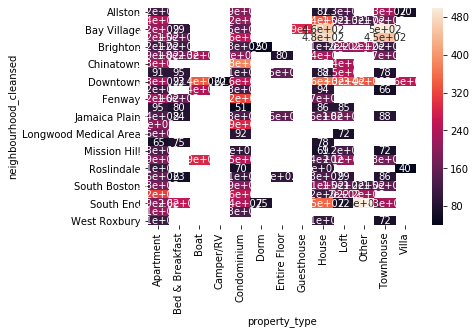

In [20]:
sns.heatmap(listings.groupby(['neighbourhood_cleansed','property_type']).price.mean().unstack(),annot=True)

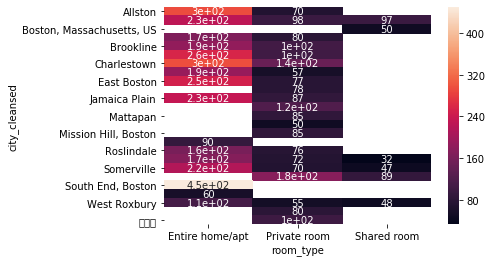

In [21]:
sns.heatmap(listings.groupby(['city_cleansed','room_type']).price.mean().unstack(),annot=True)

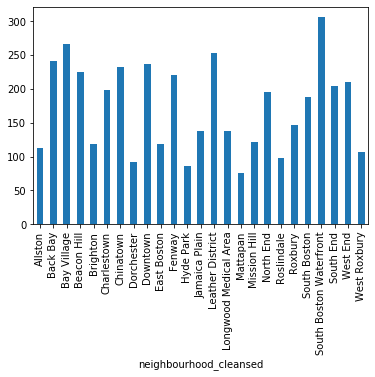

In [22]:
listings.groupby('neighbourhood_cleansed')['price'].mean().plot(x='neighbourhood_cleansed',y='price',kind='bar')

In [23]:

'''
cleaning amenities to create new features
after removing and cleaning this feature we create a numpy matrix holding unique values to create new categorical features
'''
listings['amenities']=listings['amenities'].map(lambda amns: '|'.join([x.replace('}','').replace('{','').replace('"','') for x in amns.split(',')]))

amenities=np.unique(np.concatenate(listings['amenities'].map(lambda amns:amns.split('|')).values))

amenities_matrix=np.array([listings['amenities'].map(lambda amns:amn in amns).values for amn in amenities])



In [24]:
'''
creating features dataframe used in training and testing
'''
features=listings[['host_listings_count', 'host_total_listings_count', 'accommodates',
                     'bathrooms', 'bedrooms', 'beds', 'price', 'guests_included', 'number_of_reviews',
                     'review_scores_rating']]

listings['amenities'].map(lambda amns:amns.split('|')).head()


0    [TV, Wireless Internet, Kitchen, Free Parking ...
1    [TV, Internet, Wireless Internet, Air Conditio...
2    [TV, Cable TV, Wireless Internet, Air Conditio...
3    [TV, Internet, Wireless Internet, Air Conditio...
4    [Internet, Wireless Internet, Air Conditioning...
Name: amenities, dtype: object

In [16]:
amenity_arr = np.array([listings['amenities'].map(lambda amns: amn in amns) for amn in amenities])
features=pd.concat([features,pd.DataFrame(data=amenity_arr.T,columns=amenities)],axis=1)

for tf_feature in ['host_is_superhost', 'host_identity_verified', 'host_has_profile_pic',
                   'is_location_exact', 'requires_license', 'instant_bookable',
                   'require_guest_profile_picture', 'require_guest_phone_verification']:

    features[tf_feature]=listings[tf_feature].map(lambda s:False if s=='f' else True)
for categorical_feature in ['neighbourhood_cleansed', 'property_type', 'room_type', 'bed_type']:
    features=pd.concat([features,pd.get_dummies(listings[categorical_feature])],axis=1)
features.head()



,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,guests_included,number_of_reviews,review_scores_rating,,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,Dryer,Elevator in Building,Essentials,Family/Kid Friendly,Fire Extinguisher,First Aid Kit,Free Parking on Premises,Free Parking on Street,Gym,Hair Dryer,Hangers,Heating,Hot Tub,Indoor Fireplace,Internet,Iron,Kitchen,Laptop Friendly Workspace,Lock on Bedroom Door,Other pet(s),Paid Parking Off Premises,Pets Allowed,Pets live on this property,Pool,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50,host_is_superhost,host_identity_verified,host_has_profile_pic,is_location_exact,requires_license,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,Allston,Back Bay,Bay Village,Beacon Hill,Brighton,Charlestown,Chinatown,Dorchester,Downtown,East Boston,Fenway,Hyde Park,Jamaica Plain,Leather District,Longwood Medical Area,Mattapan,Mission Hill,North End,Roslindale,Roxbury,South Boston,South Boston Waterfront,South End,West End,West Roxbury,Apartment,Bed & Breakfast,Boat,Camper/RV,Condominium,Dorm,Entire Floor,Guesthouse,House,Loft,Other,Townhouse,Villa,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed
0,1,1,4,1.5,2.0,3.0,250,1,0,NaN,True,False,False,False,False,False,False,False,True,False,True,False,True,True,True,False,True,False,False,False,False,True,False,False,True,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,True,False,False,True,False,False,False,False,True,True,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
1,1,1,2,1.0,1.0,1.0,65,0,36,94.0,True,False,True,False,False,False,True,False,True,False,True,False,True,True,True,False,False,False,False,True,True,True,False,False,True,True,True,False,True,False,False,True,True,False,False,True,True,False,False,True,True,False,False,True,False,False,False,True,True,True,False,True,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,1,1,2,1.0,1.0,1.0,65,1,41,98.0,True,False,True,False,False,True,True,False,False,False,True,False,True,False,False,True,True,False,False,False,False,True,False,False,True,False,True,False,True,False,False,False,False,False,True,True,True,False,False,True,True,False,False,True,True,True,True,True,True,True,False,False,True,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,1,1,4,1.0,1.0,2.0,75,2,1,100.0,True,False,True,True,False,False,True,False,False,False,True,False,True,False,True,True,True,False,True,True,True,True,False,True,True,True,True,True,False,False,False,False,False,False,True,True,True,False,False,True,True,False,False,True,False,False,False,False,True,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
4,1,1,2,1.5,1.0,2.0,79,1,29,99.0,True,False,True,True,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,True,True,True,False,False,True,True,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,True,True,True,True,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


bathrooms
bedrooms
beds
review_scores_rating


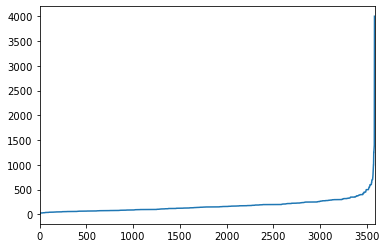

In [17]:
for col in features.columns[features.isnull().any()]:
    print(col)

for col in features.columns[features.isnull().any()]:
    features[col]=features[col].fillna(features[col].median())
features['price'].sort_values().reset_index(drop=True).plot()


In [18]:
'''
using random forest regression it's accuracy 41 dollar range and spliting data to train and test splits
'''

#using -1 in n_jobs to run maximum multiple parallel run

clf=RandomForestRegressor(n_jobs=-1)
'''
also used only house data which had price more than or equal to 300 to increase accuracy
'''
x=features.query('price<=300')
y=x['price'].values
x=x.loc[:,x.columns!='price'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

clf.fit(x_train,y_train)
preds=clf.predict(x_test)

mse=mean_squared_error(y_test,preds)
mse**(1/2)





41.96873858064717

In [19]:
#also tried linear regression and it's accuracy 42 dollar range
lr=LinearRegression()
lr.fit(x_train,y_train)
mse=mean_squared_error(y_test,lr.predict(x_test))
mse**(1/2)


42.72258211761316